In [435]:
#Source: https://github.com/tensorflow/docs/blob/master/site/en/tutorials/load_data/images.ipynb
#https://www.tensorflow.org/tutorials/images/classification?hl=en
import numpy as np
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import pandas as pd


import sys
from PIL import Image
sys.modules['Image'] = Image 

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

import pathlib

In [436]:
tf.__version__

'2.3.1'

In [437]:
# Get current path
ROOT_PATH = os.path.abspath('')

In [457]:
train_dir = pathlib.Path(ROOT_PATH).joinpath("train/")
train_dir

WindowsPath('D:/keras/train')

In [458]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

208


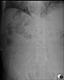

In [459]:
healthy = list(train_dir.glob('healthy/*'))
PIL.Image.open(str(healthy[0]))

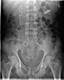

In [460]:
patients = list(train_dir.glob('patient/*'))
PIL.Image.open(str(patients[1]))

In [461]:
test_dir = pathlib.Path(ROOT_PATH).joinpath("test/")
test_dir

WindowsPath('D:/keras/test')

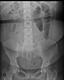

In [462]:
test_healthy=list(test_dir.glob('healthy/*'))
PIL.Image.open(str(test_healthy[0]))

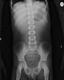

In [463]:
test_patients = list(test_dir.glob('patient/*'))
PIL.Image.open(str(test_patients[1]))

In [520]:
batch_size = 32
img_height = 80
img_width = 64

In [561]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=False,
    seed=42) # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='binary',
    shuffle=False) # set as test data



Found 167 images belonging to 2 classes.
Found 41 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [562]:
# TEST DIR'DA healthy ve patient diye ayrılmalı

In [563]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd',loss="binary_crossentropy",metrics=["accuracy"])

In [564]:
epochs=1000
history=model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs)

Epoch 1/1000
5/5 [==============================] - 2s 414ms/step - loss: 0.5620 - accuracy: 0.7188 - val_loss: 0.4457 - val_accuracy: 0.8438
Epoch 2/1000
5/5 [==============================] - 1s 246ms/step - loss: 0.9692 - accuracy: 0.7926 - val_loss: 0.6047 - val_accuracy: 0.8438
Epoch 3/1000
5/5 [==============================] - 1s 243ms/step - loss: 0.7197 - accuracy: 0.7926 - val_loss: 0.6073 - val_accuracy: 0.8750
Epoch 4/1000
5/5 [==============================] - 1s 249ms/step - loss: 0.6315 - accuracy: 0.7926 - val_loss: 0.5584 - val_accuracy: 0.8438
Epoch 5/1000
5/5 [==============================] - 1s 247ms/step - loss: 0.6999 - accuracy: 0.7926 - val_loss: 0.6067 - val_accuracy: 0.8125
Epoch 6/1000
5/5 [==============================] - 1s 244ms/step - loss: 0.6004 - accuracy: 0.7926 - val_loss: 0.5453 - val_accuracy: 0.8438
Epoch 7/1000
5/5 [==============================] - 1s 249ms/step - loss: 0.5481 - accuracy: 0.7926 - val_loss: 0.5333 - val_accuracy: 0.7812
Epoch 

5/5 [==============================] - 1s 241ms/step - loss: 0.1620 - accuracy: 1.0000 - val_loss: 0.4305 - val_accuracy: 0.8438
Epoch 59/1000
5/5 [==============================] - 1s 244ms/step - loss: 0.6224 - accuracy: 0.7926 - val_loss: 0.4369 - val_accuracy: 0.8438
Epoch 60/1000
5/5 [==============================] - 1s 292ms/step - loss: 0.5866 - accuracy: 0.7926 - val_loss: 0.5220 - val_accuracy: 0.7812
Epoch 61/1000
5/5 [==============================] - 1s 240ms/step - loss: 0.5610 - accuracy: 0.7926 - val_loss: 0.4879 - val_accuracy: 0.8125
Epoch 62/1000
5/5 [==============================] - 1s 283ms/step - loss: 0.5017 - accuracy: 0.8250 - val_loss: 0.4518 - val_accuracy: 0.8438
Epoch 63/1000
5/5 [==============================] - 1s 244ms/step - loss: 0.5465 - accuracy: 0.7926 - val_loss: 0.4485 - val_accuracy: 0.8438
Epoch 64/1000
5/5 [==============================] - 1s 239ms/step - loss: 0.5522 - accuracy: 0.7926 - val_loss: 0.4489 - val_accuracy: 0.8438
Epoch 65/1000

5/5 [==============================] - 1s 252ms/step - loss: 0.5480 - accuracy: 0.7926 - val_loss: 0.4825 - val_accuracy: 0.8125
Epoch 116/1000
5/5 [==============================] - 1s 255ms/step - loss: 0.5529 - accuracy: 0.7926 - val_loss: 0.4828 - val_accuracy: 0.8125
Epoch 117/1000
5/5 [==============================] - 1s 253ms/step - loss: 0.5442 - accuracy: 0.7926 - val_loss: 0.4845 - val_accuracy: 0.8125
Epoch 118/1000
5/5 [==============================] - 1s 265ms/step - loss: 0.5311 - accuracy: 0.7926 - val_loss: 0.4430 - val_accuracy: 0.8438
Epoch 119/1000
5/5 [==============================] - 1s 260ms/step - loss: 0.1736 - accuracy: 1.0000 - val_loss: 0.5342 - val_accuracy: 0.7812
Epoch 120/1000
5/5 [==============================] - 1s 253ms/step - loss: 0.5733 - accuracy: 0.7926 - val_loss: 0.4812 - val_accuracy: 0.8125
Epoch 121/1000
5/5 [==============================] - 1s 256ms/step - loss: 0.5638 - accuracy: 0.7926 - val_loss: 0.3517 - val_accuracy: 0.9062
Epoch 1

Epoch 172/1000
5/5 [==============================] - 2s 306ms/step - loss: 0.4932 - accuracy: 0.8250 - val_loss: 0.4803 - val_accuracy: 0.8125
Epoch 173/1000
5/5 [==============================] - 2s 307ms/step - loss: 0.4921 - accuracy: 0.8250 - val_loss: 0.4800 - val_accuracy: 0.8125
Epoch 174/1000
5/5 [==============================] - 2s 317ms/step - loss: 0.1622 - accuracy: 1.0000 - val_loss: 0.4324 - val_accuracy: 0.8438
Epoch 175/1000
5/5 [==============================] - 1s 262ms/step - loss: 0.5699 - accuracy: 0.7926 - val_loss: 0.4305 - val_accuracy: 0.8438
Epoch 176/1000
5/5 [==============================] - 1s 263ms/step - loss: 0.5619 - accuracy: 0.7926 - val_loss: 0.4812 - val_accuracy: 0.8125
Epoch 177/1000
5/5 [==============================] - 2s 301ms/step - loss: 0.4973 - accuracy: 0.8250 - val_loss: 0.4802 - val_accuracy: 0.8125
Epoch 178/1000
5/5 [==============================] - 2s 313ms/step - loss: 0.1415 - accuracy: 1.0000 - val_loss: 0.4919 - val_accuracy:

Epoch 229/1000
5/5 [==============================] - 2s 318ms/step - loss: 0.5429 - accuracy: 0.7926 - val_loss: 0.5236 - val_accuracy: 0.7812
Epoch 230/1000
5/5 [==============================] - 1s 271ms/step - loss: 0.5394 - accuracy: 0.7926 - val_loss: 0.4804 - val_accuracy: 0.8125
Epoch 231/1000
5/5 [==============================] - 1s 266ms/step - loss: 0.5489 - accuracy: 0.7926 - val_loss: 0.4818 - val_accuracy: 0.8125
Epoch 232/1000
5/5 [==============================] - 2s 307ms/step - loss: 0.4906 - accuracy: 0.8250 - val_loss: 0.4820 - val_accuracy: 0.8125
Epoch 233/1000
5/5 [==============================] - 1s 269ms/step - loss: 0.5461 - accuracy: 0.7926 - val_loss: 0.4822 - val_accuracy: 0.8125
Epoch 234/1000
5/5 [==============================] - 2s 312ms/step - loss: 0.4874 - accuracy: 0.8250 - val_loss: 0.4436 - val_accuracy: 0.8438
Epoch 235/1000
5/5 [==============================] - 1s 275ms/step - loss: 0.5331 - accuracy: 0.7926 - val_loss: 0.4414 - val_accuracy:

Epoch 286/1000
5/5 [==============================] - 1s 273ms/step - loss: 0.5438 - accuracy: 0.7926 - val_loss: 0.5245 - val_accuracy: 0.7812
Epoch 287/1000
5/5 [==============================] - 1s 273ms/step - loss: 0.5361 - accuracy: 0.7926 - val_loss: 0.4363 - val_accuracy: 0.8438
Epoch 288/1000
5/5 [==============================] - 1s 274ms/step - loss: 0.5349 - accuracy: 0.7926 - val_loss: 0.4359 - val_accuracy: 0.8438
Epoch 289/1000
5/5 [==============================] - 1s 272ms/step - loss: 0.1685 - accuracy: 1.0000 - val_loss: 0.4323 - val_accuracy: 0.8438
Epoch 290/1000
5/5 [==============================] - 2s 329ms/step - loss: 0.1169 - accuracy: 1.0000 - val_loss: 0.5060 - val_accuracy: 0.8125
Epoch 291/1000
5/5 [==============================] - 2s 330ms/step - loss: 0.6056 - accuracy: 0.7926 - val_loss: 0.4891 - val_accuracy: 0.8125
Epoch 292/1000
5/5 [==============================] - 1s 270ms/step - loss: 0.5707 - accuracy: 0.7926 - val_loss: 0.4821 - val_accuracy:

Epoch 343/1000
5/5 [==============================] - 1s 273ms/step - loss: 0.5410 - accuracy: 0.7926 - val_loss: 0.4319 - val_accuracy: 0.8438
Epoch 344/1000
5/5 [==============================] - 1s 272ms/step - loss: 0.5546 - accuracy: 0.7926 - val_loss: 0.4363 - val_accuracy: 0.8438
Epoch 345/1000
5/5 [==============================] - 1s 290ms/step - loss: 0.5317 - accuracy: 0.7926 - val_loss: 0.4792 - val_accuracy: 0.8125
Epoch 346/1000
5/5 [==============================] - 1s 288ms/step - loss: 0.5362 - accuracy: 0.7926 - val_loss: 0.3470 - val_accuracy: 0.9062
Epoch 347/1000
5/5 [==============================] - 1s 280ms/step - loss: 0.5329 - accuracy: 0.7926 - val_loss: 0.4793 - val_accuracy: 0.8125
Epoch 348/1000
5/5 [==============================] - 1s 270ms/step - loss: 0.5393 - accuracy: 0.7926 - val_loss: 0.4787 - val_accuracy: 0.8125
Epoch 349/1000
5/5 [==============================] - 2s 327ms/step - loss: 0.5467 - accuracy: 0.7926 - val_loss: 0.4335 - val_accuracy:

5/5 [==============================] - 1s 286ms/step - loss: 0.5368 - accuracy: 0.7926 - val_loss: 0.4782 - val_accuracy: 0.8125
Epoch 400/1000
5/5 [==============================] - 1s 276ms/step - loss: 0.5412 - accuracy: 0.7926 - val_loss: 0.3826 - val_accuracy: 0.8750
Epoch 401/1000
5/5 [==============================] - 1s 279ms/step - loss: 0.1498 - accuracy: 1.0000 - val_loss: 0.4305 - val_accuracy: 0.8438
Epoch 402/1000
5/5 [==============================] - 1s 276ms/step - loss: 0.5708 - accuracy: 0.7926 - val_loss: 0.3756 - val_accuracy: 0.8750
Epoch 403/1000
5/5 [==============================] - 2s 331ms/step - loss: 0.5653 - accuracy: 0.7926 - val_loss: 0.4795 - val_accuracy: 0.8125
Epoch 404/1000
5/5 [==============================] - 1s 275ms/step - loss: 0.5449 - accuracy: 0.7926 - val_loss: 0.4787 - val_accuracy: 0.8125
Epoch 405/1000
5/5 [==============================] - 1s 280ms/step - loss: 0.5548 - accuracy: 0.7926 - val_loss: 0.3856 - val_accuracy: 0.8750
Epoch 4

Epoch 456/1000
5/5 [==============================] - 1s 279ms/step - loss: 0.5644 - accuracy: 0.7926 - val_loss: 0.4772 - val_accuracy: 0.8125
Epoch 457/1000
5/5 [==============================] - 2s 332ms/step - loss: 0.4932 - accuracy: 0.8250 - val_loss: 0.4279 - val_accuracy: 0.8438
Epoch 458/1000
5/5 [==============================] - 1s 280ms/step - loss: 0.1525 - accuracy: 1.0000 - val_loss: 0.5408 - val_accuracy: 0.7812
Epoch 459/1000
5/5 [==============================] - 1s 281ms/step - loss: 0.5685 - accuracy: 0.7926 - val_loss: 0.4816 - val_accuracy: 0.8125
Epoch 460/1000
5/5 [==============================] - 2s 327ms/step - loss: 0.5593 - accuracy: 0.7926 - val_loss: 0.4278 - val_accuracy: 0.8438
Epoch 461/1000
5/5 [==============================] - 2s 334ms/step - loss: 0.5531 - accuracy: 0.7926 - val_loss: 0.4286 - val_accuracy: 0.8438
Epoch 462/1000
5/5 [==============================] - 1s 274ms/step - loss: 0.5509 - accuracy: 0.7926 - val_loss: 0.4725 - val_accuracy:

Epoch 513/1000
5/5 [==============================] - 1s 285ms/step - loss: 0.1196 - accuracy: 1.0000 - val_loss: 0.3074 - val_accuracy: 0.9062
Epoch 514/1000
5/5 [==============================] - 1s 274ms/step - loss: 0.5904 - accuracy: 0.7926 - val_loss: 0.4791 - val_accuracy: 0.8125
Epoch 515/1000
5/5 [==============================] - 1s 273ms/step - loss: 0.5594 - accuracy: 0.7926 - val_loss: 0.4183 - val_accuracy: 0.8438
Epoch 516/1000
5/5 [==============================] - 1s 278ms/step - loss: 0.1237 - accuracy: 1.0000 - val_loss: 0.3637 - val_accuracy: 0.8750
Epoch 517/1000
5/5 [==============================] - 2s 325ms/step - loss: 0.5158 - accuracy: 0.8250 - val_loss: 0.4260 - val_accuracy: 0.8438
Epoch 518/1000
5/5 [==============================] - 2s 329ms/step - loss: 0.4977 - accuracy: 0.8250 - val_loss: 0.4209 - val_accuracy: 0.8438
Epoch 519/1000
5/5 [==============================] - 1s 288ms/step - loss: 0.5615 - accuracy: 0.7926 - val_loss: 0.4739 - val_accuracy:

Epoch 570/1000
5/5 [==============================] - 1s 279ms/step - loss: 0.5379 - accuracy: 0.7926 - val_loss: 0.4239 - val_accuracy: 0.8438
Epoch 571/1000
5/5 [==============================] - 1s 274ms/step - loss: 0.5274 - accuracy: 0.7926 - val_loss: 0.4265 - val_accuracy: 0.8438
Epoch 572/1000
5/5 [==============================] - 2s 345ms/step - loss: 0.5307 - accuracy: 0.7926 - val_loss: 0.4684 - val_accuracy: 0.8125
Epoch 573/1000
5/5 [==============================] - 1s 286ms/step - loss: 0.5334 - accuracy: 0.7926 - val_loss: 0.4260 - val_accuracy: 0.8438
Epoch 574/1000
5/5 [==============================] - 2s 327ms/step - loss: 0.5338 - accuracy: 0.7926 - val_loss: 0.4184 - val_accuracy: 0.8438
Epoch 575/1000
5/5 [==============================] - 1s 282ms/step - loss: 0.5245 - accuracy: 0.7926 - val_loss: 0.4672 - val_accuracy: 0.8125
Epoch 576/1000
5/5 [==============================] - 2s 335ms/step - loss: 0.5301 - accuracy: 0.7926 - val_loss: 0.3787 - val_accuracy:

Epoch 627/1000
5/5 [==============================] - 2s 331ms/step - loss: 0.4704 - accuracy: 0.8250 - val_loss: 0.4486 - val_accuracy: 0.8125
Epoch 628/1000
5/5 [==============================] - 1s 283ms/step - loss: 0.5308 - accuracy: 0.7926 - val_loss: 0.4652 - val_accuracy: 0.8125
Epoch 629/1000
5/5 [==============================] - 1s 279ms/step - loss: 0.5108 - accuracy: 0.7926 - val_loss: 0.5043 - val_accuracy: 0.7812
Epoch 630/1000
5/5 [==============================] - 2s 329ms/step - loss: 0.4704 - accuracy: 0.8250 - val_loss: 0.4257 - val_accuracy: 0.8438
Epoch 631/1000
5/5 [==============================] - 1s 277ms/step - loss: 0.5305 - accuracy: 0.7926 - val_loss: 0.3828 - val_accuracy: 0.8750
Epoch 632/1000
5/5 [==============================] - 1s 283ms/step - loss: 0.5181 - accuracy: 0.7926 - val_loss: 0.4107 - val_accuracy: 0.8438
Epoch 633/1000
5/5 [==============================] - 1s 284ms/step - loss: 0.5145 - accuracy: 0.7926 - val_loss: 0.4565 - val_accuracy:

Epoch 684/1000
5/5 [==============================] - 1s 287ms/step - loss: 0.5056 - accuracy: 0.7926 - val_loss: 0.3625 - val_accuracy: 0.8750
Epoch 685/1000
5/5 [==============================] - 1s 283ms/step - loss: 0.5018 - accuracy: 0.7926 - val_loss: 0.4510 - val_accuracy: 0.8125
Epoch 686/1000
5/5 [==============================] - 2s 340ms/step - loss: 0.4637 - accuracy: 0.8250 - val_loss: 0.4001 - val_accuracy: 0.8438
Epoch 687/1000
5/5 [==============================] - 2s 348ms/step - loss: 0.4626 - accuracy: 0.8250 - val_loss: 0.4061 - val_accuracy: 0.8438
Epoch 688/1000
5/5 [==============================] - 1s 288ms/step - loss: 0.4945 - accuracy: 0.7926 - val_loss: 0.4621 - val_accuracy: 0.8125
Epoch 689/1000
5/5 [==============================] - 1s 286ms/step - loss: 0.5108 - accuracy: 0.7926 - val_loss: 0.4003 - val_accuracy: 0.8438
Epoch 690/1000
5/5 [==============================] - 1s 280ms/step - loss: 0.5160 - accuracy: 0.7926 - val_loss: 0.4527 - val_accuracy:

KeyboardInterrupt: 

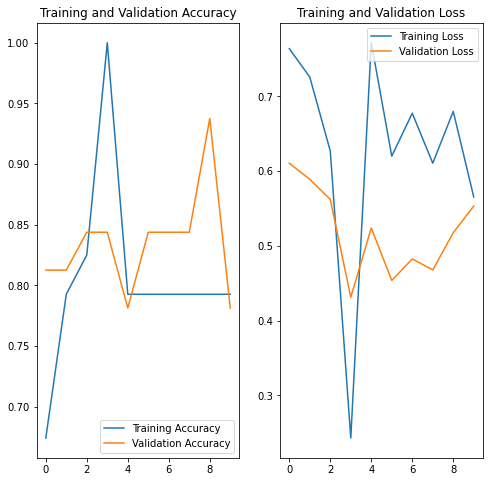

In [558]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [559]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1,steps=len(test_generator))
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


top=0.0
ort=0.0
for i in range(len(pred)):
    score = tf.nn.softmax(pred[i])
    max=100 * np.max(score)
    print("The image {} most likely belongs to {} with a {:.2f} percent confidence."
    .format(i,predictions[np.argmax(score)],max )
    )
    top=top+max
ort=top/(len(pred))
print("Average confidence:",ort)


15/15 [==============================] - 0s 5ms/step
The image 0 most likely belongs to healthy with a 100.00 percent confidence.
The image 1 most likely belongs to healthy with a 100.00 percent confidence.
The image 2 most likely belongs to healthy with a 100.00 percent confidence.
The image 3 most likely belongs to healthy with a 100.00 percent confidence.
The image 4 most likely belongs to healthy with a 100.00 percent confidence.
The image 5 most likely belongs to healthy with a 100.00 percent confidence.
The image 6 most likely belongs to healthy with a 100.00 percent confidence.
The image 7 most likely belongs to healthy with a 100.00 percent confidence.
The image 8 most likely belongs to healthy with a 100.00 percent confidence.
The image 9 most likely belongs to healthy with a 100.00 percent confidence.
The image 10 most likely belongs to healthy with a 100.00 percent confidence.
The image 11 most likely belongs to healthy with a 100.00 percent confidence.
The image 12 most lik

In [560]:
# Get filenames (set shuffle=false in generator is important)
filenames=test_generator.filenames
# Data frame
results=pd.DataFrame({"file":filenames,"pr":predictions[np.argmax(score)]})
print(results)

                                        file       pr
0   healthy\Saltmisdokuz_resized_resized.jpg  healthy
1    healthy\Saltmisdort_resized_resized.jpg  healthy
2      healthy\Selliyedi_resized_resized.jpg  healthy
3        healthy\Skirkuc_resized_resized.jpg  healthy
4     healthy\Sotuzsekiz_resized_resized.jpg  healthy
5         healthy\Ssekiz_resized_resized.jpg  healthy
6     patient\altmisalti_resized_resized.jpg  healthy
7      patient\altmisbes_resized_resized.jpg  healthy
8      patient\altmisbir_resized_resized.jpg  healthy
9    patient\altmisdokuz_resized_resized.jpg  healthy
10    patient\altmisdort_resized_resized.jpg  healthy
11     patient\altmisiki_resized_resized.jpg  healthy
12   patient\altmissekiz_resized_resized.jpg  healthy
13      patient\altmisuc_resized_resized.jpg  healthy
14    patient\altmisyedi_resized_resized.jpg  healthy
